In [1]:
import phoebe
from phoebe import u,c
import matplotlib.cm as cm
logger = phoebe.logger(clevel='WARNING')

Phoebe is capable of building all kinds of heirarchies, but the simplest way to begin is by loading the default binary and then changing its parameters as we wish

In [2]:
b = phoebe.default_binary()

This object is known as a 'bundle' and contains all the parameters of the system as well as some callable methods.

In [3]:
b

<PHOEBE Bundle: 141 parameters | contexts: component, system, figure, compute, setting, constraint>

Let's investigate parameters related to compute contained in the bundle

In [4]:
print(b['compute'])

ParameterSet: 17 parameters
     sample_from@phoebe01@compute: []
        comments@phoebe01@compute: 
      use_server@phoebe01@compute: none
   dynamics_method@phoebe01@co...: keplerian
            ltte@phoebe01@compute: False
    irrad_method@phoebe01@compute: horvat
   boosting_method@phoebe01@co...: none
   eclipse_method@phoebe01@com...: native
   horizon_method@phoebe01@com...: boolean
   mesh_method@primary@phoebe0...: marching
   mesh_method@secondary@phoeb...: marching
   ntriangles@primary@phoebe01...: 1500
   ntriangles@secondary@phoebe...: 1500
   distortion_method@primary@p...: roche
   distortion_method@secondary...: roche
     atm@primary@phoebe01@compute: ck2004
   atm@secondary@phoebe01@compute: ck2004


Can access these parameters through twigs (minimum string required to define a particular parameter) or filters

In [5]:
b.filter(context='compute', component='primary', qualifier='ntriangles').get_parameter()

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [6]:
b['ntriangles@primary@compute']

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In the same way, we can set these parameters

In [7]:
b['ntriangles@primary@compute']=200000

In [8]:
b.filter(context='compute', component='primary', qualifier='ntriangles').set_value(1500)

Before we can actually run a model, we need to tell phoebe what to evaluate.  Is it a light curve? RV curve? Orbit? At what times? 
We do this by adding datasets (which can include the real data for comparison).

In [9]:
b.add_dataset('lc', times=phoebe.linspace(0, 1, 51)*u.d, dataset='lc01',passband='Johnson:V')

<ParameterSet: 80 parameters | contexts: figure, dataset, constraint, compute>

100%|██████████| 51/51 [00:01<00:00, 48.51it/s]


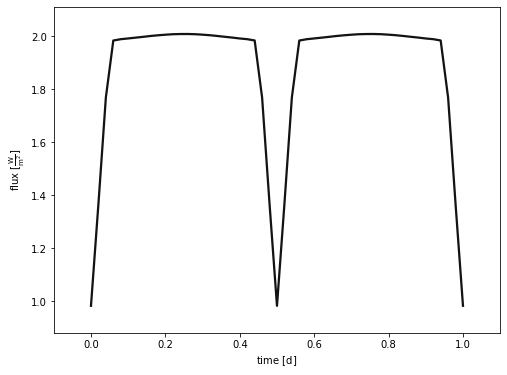

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [10]:
b.run_compute()
b.plot(show=True)

Another example: meshes

In [11]:
b.add_dataset('mesh', compute_times=[0,0.25], dataset='mesh01')

<ParameterSet: 85 parameters | contexts: figure, dataset, constraint, compute>

In [12]:
b.run_compute()

Fri, 16 Sep 2022 14:28 BUNDLE       WARNING overwriting model: latest
100%|██████████| 52/52 [00:01<00:00, 43.64it/s]


<ParameterSet: 21 parameters | kinds: lc, mesh>

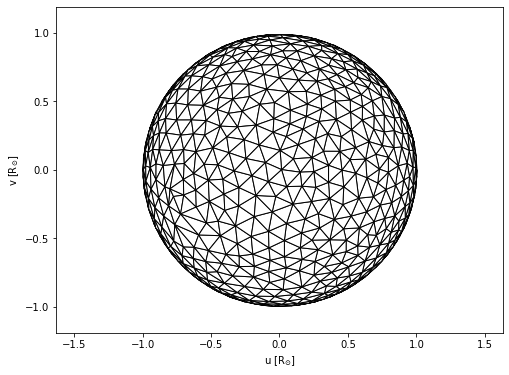

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [13]:
b['mesh01@model'].plot(time=0,show=True)

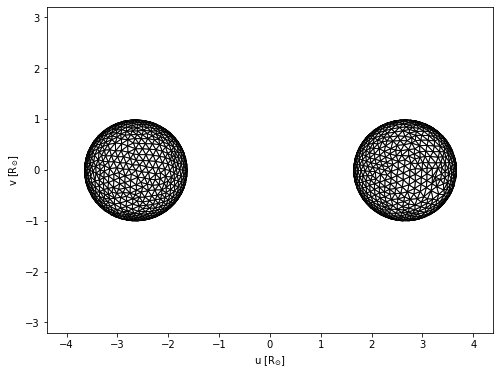

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [14]:
b['mesh01@model'].plot(time=0.25,show=True)

Meshes can even be plotted with face colours that represent temperature or intensity

Fri, 16 Sep 2022 14:28 BUNDLE       WARNING overwriting model: latest
100%|██████████| 52/52 [00:01<00:00, 46.57it/s]


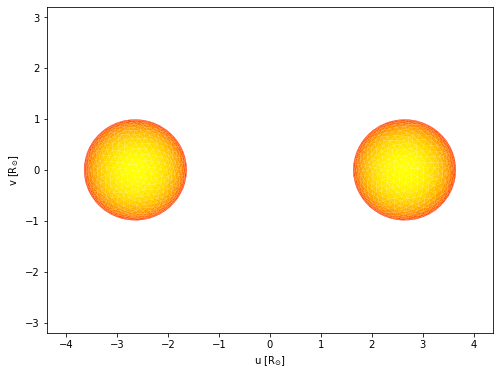

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [15]:
b.add_dataset('mesh', compute_times=[0.24], dataset='mesh02',columns=['visibilities', 'intensities@lc01'])
b.run_compute()
b['mesh02@model'].plot(fc='intensities@lc01', ec='None',fcmap=cm.autumn,show=True)

If we have time, you might want to play around with changing the parameters of the stars and/or orbit, in order to see what effect those changes have on the light curve. There are plenty to choose from!

In [16]:
print(b['component'])

ParameterSet: 62 parameters
         requiv@primary@component: 1.0 solRad
C    requiv_max@primary@component: 2.013275176537638 solRad
           teff@primary@component: 6000.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.437551877570185
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 90.0 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
C          mass@primary@component: 0.9988131358058301 solMass
       requiv@secondary@component: 1.0 solRad
C  requiv_max@secondary@component: 2.013275176537638 solRad
         t

Fri, 16 Sep 2022 14:28 BUNDLE       WARNING overwriting model: latest
100%|██████████| 52/52 [00:00<00:00, 57.61it/s]


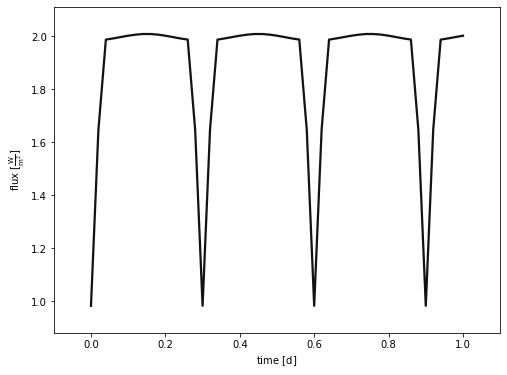

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [17]:
b['period@binary']=0.6*u.d
b.run_compute()
b['lc01@model'].plot(show=True)

You will often run into issues with parameters going out of acceptable ranges. Also, remember that we are sampling the model light curve only at the time we defined earlier when adding the lc dataset - this can lead to artefacts in the plotted curve!